# Week 13 Homework Template 

This week you will explore using an API to grab data. You will use the twitter api to get data surrounding a particular topic. You will then

1. Cleanup the data
2. Implement a simple word frequency analysis and 
3. Perform a basic sentiment analysis 

using this data. 

The above tasks are fundamental tasks associated with natural language processing.
You will use the `tweepy` Python package to work with twitter data. 

# Run this after you activate our ea environment
conda install -c conda-forge textblob
conda install -c conda-forge tweepy

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
from collections import Counter
from textblob import TextBlob
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re

sns.set(font_scale=1.5)
sns.set_style("whitegrid")


In [29]:
def remove_url(txt):
    """Replace url's found in a 
    text string with nothing (ie it will remove the url from 
    the string.)

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

To begin create variables to store your keys.
IMPORTANT: do NOT commit this information to github!! 

# Setup the API Key
consumer_key= 'yourkeyhere'
consumer_secret= 'yourkeyhere'
access_token= 'yourkeyhere'
access_token_secret= 'yourkeyhere'

In [30]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)


## Plot 1 - Word Frequency Analysis - Top 20 Words
Note that if you run a search too often - the twitter API will slow things down. Thus if things begin to hang when you run a query either be patient and let it go. Or work on something else for a bit and come back to it.

In [31]:
# Be sure to create a custom search term & the number of tweets 1000 
search_term = "#wildlife -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-04-23').items(100)
all_tweets = [remove_url(tweet.text) for tweet in tweets]

In [32]:
# Create a sublist of words for each tweet, all lower case
words_in_tweet = [tweet.lower().split() for tweet in all_tweets]
# Download stopwords & remove stopwords from tweets
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

[nltk_data] Downloading package stopwords to /Users/leah-
[nltk_data]     su/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
# Remove collection words - customize this to represent your chosen search term(s)
collection_words = ['wildlife', 'amp']
tweets_cleaned = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [46]:
all_words = [item for sublist in tweets_cleaned for item in sublist]
word_counts = collections.Counter(all_words)
word_counts.most_common(15)

[('nature', 9),
 ('birds', 8),
 ('sign', 7),
 ('plaque', 6),
 ('like', 5),
 ('know', 5),
 ('bird', 5),
 ('wild', 5),
 ('thank', 4),
 ('call', 4),
 ('look', 4),
 ('good', 4),
 ('animal', 4),
 ('via', 4),
 ('new', 4)]

In [47]:
# Turn counts into dataframe for plotting
df_tweet_words = pd.DataFrame(word_counts.most_common(20),
                             columns=['words', 'count'])

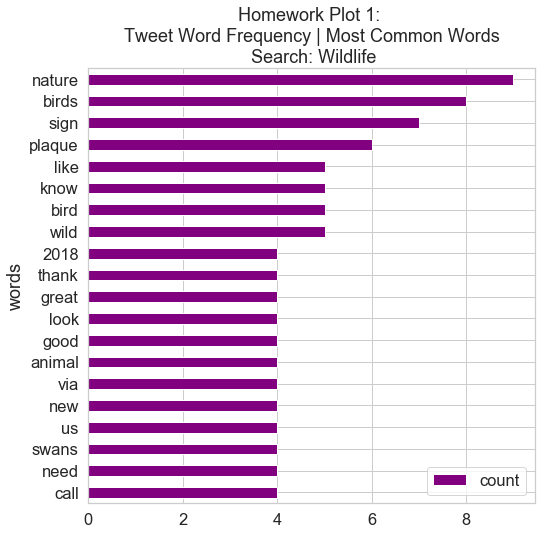

In [49]:
fig, ax = plt.subplots(figsize=(8, 8))
df_tweet_words.sort_values(by="count").plot.barh(x='words',
                         y='count',
                         ax=ax,
                         color="purple")
ax.set_title("Homework Plot 1: \nTweet Word Frequency | Most Common Words\n Search: Wildlife")
plt.show()

## Homework Plot 2 - Sentiment Analysis

In [57]:
tb_tweets = [TextBlob(tweet) for tweet in all_tweets]
tweet_sentiment = [[tweet.sentiment.polarity, str(tweet)] for tweet in tb_tweets]
tweet_sentiment_df = pd.DataFrame(tweet_sentiment, 
                                  columns=["polarity", "tweet"])
tweet_sentiment

52.7 ms ± 912 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


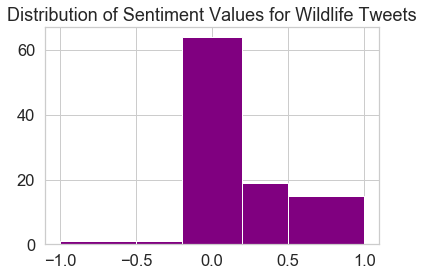

In [54]:
# Plot your data
fig, ax = plt.subplots()
tweet_sentiment_df.hist(bins=[-1, -.5, -.2, .2, .5, 1],
                        ax=ax,
                        color="purple")
ax.set_title("Distribution of Sentiment Values for Wildlife Tweets")
plt.show()